<a href="https://colab.research.google.com/github/SatvikNalavade/colab_notebooks/blob/main/llama-2-7b-chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content
!apt-get -y install -qq aria2

!git clone -b v2.5 https://github.com/camenduru/text-generation-webui
%cd /content/text-generation-webui
!pip install -q -r requirements.txt

!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/resolve/main/model-00001-of-00002.safetensors -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o model-00001-of-00002.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/resolve/main/model-00002-of-00002.safetensors -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o model-00002-of-00002.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/raw/main/model.safetensors.index.json -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o model.safetensors.index.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/raw/main/special_tokens_map.json -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o special_tokens_map.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/resolve/main/tokenizer.model -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o tokenizer.model
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/raw/main/tokenizer_config.json -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o tokenizer_config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/raw/main/config.json -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/4bit/Llama-2-7b-chat-hf/raw/main/generation_config.json -d /content/text-generation-webui/models/Llama-2-7b-chat-hf -o generation_config.json

!echo "dark_theme: true" > /content/settings.yaml
!echo "chat_style: wpp" >> /content/settings.yaml

%cd /content/text-generation-webui
!python server.py --share --settings /content/settings.yaml --model /content/text-generation-webui/models/Llama-2-7b-chat-hf

In [8]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,618 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

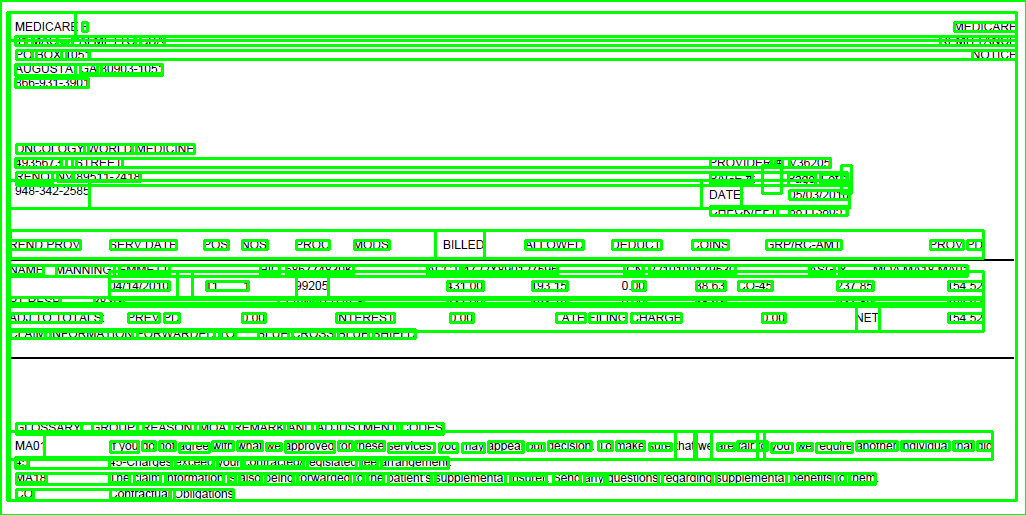

In [9]:
import cv2
import pytesseract

def detect_text(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to preprocess the image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform text detection using Tesseract
    custom_config = r'--oem 3 --psm 6' # OCR Engine Mode: 3 (Default, fully automatic) Page Segmentation Mode: 6 (Assume a single uniform block of text.)
    text = pytesseract.image_to_data(thresh, config=custom_config, output_type=pytesseract.Output.DICT)

    # Loop through each detected text region and draw a bounding box
    for i in range(len(text['text'])):
        x, y, w, h = text['left'][i], text['top'][i], text['width'][i], text['height'][i]
        # Draw the bounding box rectangle
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with bounding boxes
    cv2_imshow(image)

# Example usage
# Replace 'image_path' with the path to your image file
image_path = '/content/u4_remit-cutout.jpg'
detect_text(image_path)


In [2]:
from google.colab import files

def upload_images():
    print("Please upload 5-10 images:")
    uploaded_files = files.upload()
    image_paths = list(uploaded_files.keys())
    return image_paths

# Example usage
image_paths = upload_images()
print("Uploaded images:", image_paths)


Please upload 5-10 images:


Saving AllergyInjectionEOB1-2021-scaled.webp to AllergyInjectionEOB1-2021-scaled.webp
Saving ebam-simplified-eob.jpg to ebam-simplified-eob.jpg
Saving healthcare-news-2022-BCBSTX-Pg1-draft2 - Copy.jpg to healthcare-news-2022-BCBSTX-Pg1-draft2 - Copy.jpg
Saving healthcare-news-2022-BCBSTX-Pg1-draft2.jpg to healthcare-news-2022-BCBSTX-Pg1-draft2.jpg
Saving u4_remit-cutout.jpg to u4_remit-cutout.jpg
Saving u5_remit-cutout.jpg to u5_remit-cutout.jpg
Uploaded images: ['AllergyInjectionEOB1-2021-scaled.webp', 'ebam-simplified-eob.jpg', 'healthcare-news-2022-BCBSTX-Pg1-draft2 - Copy.jpg', 'healthcare-news-2022-BCBSTX-Pg1-draft2.jpg', 'u4_remit-cutout.jpg', 'u5_remit-cutout.jpg']


In [10]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,556 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [11]:
import cv2
import pytesseract

def detect_text(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to preprocess the image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform text detection using Tesseract
    custom_config = r'--oem 3 --psm 6' # OCR Engine Mode: 3 (Default, fully automatic) Page Segmentation Mode: 6 (Assume a single uniform block of text.)
    text = pytesseract.image_to_data(thresh, config=custom_config, output_type=pytesseract.Output.DICT)

    # List to store bounding box coordinates
    bounding_boxes = []

    # Loop through each detected text region and append bounding box coordinates to the list
    for i in range(len(text['text'])):
        x, y, w, h = text['left'][i], text['top'][i], text['width'][i], text['height'][i]
        bounding_boxes.append((x, y, w, h))

    return bounding_boxes

# Example usage
bounding_boxes_list = []
for image_path in image_paths:
    bounding_boxes = detect_text(image_path)
    bounding_boxes_list.append(bounding_boxes)

# Print the bounding box coordinates for each image
for i, bounding_boxes in enumerate(bounding_boxes_list):
    print(f"Bounding boxes for Image {i + 1}:")
    for box in bounding_boxes:
        print(box)


Bounding boxes for Image 1:
(0, 0, 2560, 1978)
(34, 108, 2475, 1816)
(48, 108, 2461, 1816)
(139, 108, 53, 25)
(139, 108, 53, 25)
(125, 127, 81, 21)
(125, 127, 81, 21)
(126, 138, 1408, 76)
(126, 138, 73, 76)
(1031, 146, 77, 24)
(1118, 146, 116, 24)
(1243, 146, 39, 24)
(1307, 146, 120, 24)
(1434, 147, 100, 23)
(109, 187, 1024, 25)
(155, 183, 20, 40)
(1031, 188, 77, 24)
(1117, 189, 16, 22)
(94, 218, 2392, 61)
(94, 218, 157, 61)
(1032, 230, 28, 24)
(2195, 230, 73, 25)
(2278, 230, 26, 25)
(2314, 229, 97, 26)
(2379, 210, 21, 61)
(2421, 229, 65, 26)
(85, 318, 219, 34)
(85, 318, 104, 34)
(202, 318, 102, 34)
(85, 387, 1017, 30)
(85, 388, 78, 22)
(170, 387, 102, 23)
(278, 387, 43, 23)
(328, 387, 66, 23)
(401, 394, 30, 16)
(437, 389, 102, 28)
(548, 389, 31, 25)
(586, 388, 57, 22)
(652, 387, 49, 23)
(705, 387, 124, 29)
(834, 389, 17, 21)
(856, 394, 32, 16)
(894, 387, 111, 30)
(1014, 389, 15, 25)
(1036, 389, 66, 21)
(944, 448, 92, 19)
(944, 448, 92, 19)
(84, 473, 2012, 34)
(84, 473, 81, 34)
(604, 4

In [17]:
def compare_bounding_boxes(bounding_boxes1, bounding_boxes2, threshold=10):
    similar_boxes = []

    # Iterate over each bounding box in the first set
    for box1 in bounding_boxes1:
        # Iterate over each bounding box in the second set
        for box2 in bounding_boxes2:
            # Calculate the distance between the centroids of the bounding boxes
            dist = ((box1[0] + box1[2] / 2) - (box2[0] + box2[2] / 2)) ** 2 + ((box1[1] + box1[3] / 2) - (box2[1] + box2[3] / 2)) ** 2
            if dist < threshold:
                similar_boxes.append((box1, box2))
                break  # Break after finding a similar box

    return similar_boxes


# Example usage
similar_boxes = compare_bounding_boxes(bounding_boxes_list[0], bounding_boxes_list[1])
print("Similar bounding boxes between Image 1 and Image 2:")
for box_pair in similar_boxes:
    print("Box in Image 1:", box_pair[0])
    print("Box in Image 2:", box_pair[1])


Similar bounding boxes between Image 1 and Image 2:


In [18]:
from sklearn.cluster import AgglomerativeClustering

def cluster_images(bounding_boxes_list, threshold=10):
    # Initialize a matrix to store the similarity between images
    similarity_matrix = [[0]*len(bounding_boxes_list) for _ in range(len(bounding_boxes_list))]

    # Compute similarity between images
    for i in range(len(bounding_boxes_list)):
        for j in range(i + 1, len(bounding_boxes_list)):
            similar_boxes = compare_bounding_boxes(bounding_boxes_list[i], bounding_boxes_list[j], threshold)
            similarity_matrix[i][j] = len(similar_boxes)
            similarity_matrix[j][i] = len(similar_boxes)

    # Perform hierarchical clustering
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=1, linkage='complete').fit(similarity_matrix)

    # Get the clusters
    clusters = {}
    for i, label in enumerate(clustering.labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(i)

    return clusters

# Example usage
clusters = cluster_images(bounding_boxes_list)
print("Clusters of similar images:")
# Add edges based on similarity between images
for cluster_id, image_indices in clusters.items():
    for i in range(len(image_indices)):
        for j in range(i + 1, len(image_indices)):
            similar_boxes = compare_bounding_boxes(bounding_boxes_list[image_indices[i]], bounding_boxes_list[image_indices[j]], threshold)
            if similar_boxes:
                G.add_edge(image_indices[i], image_indices[j])



Clusters of similar images:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


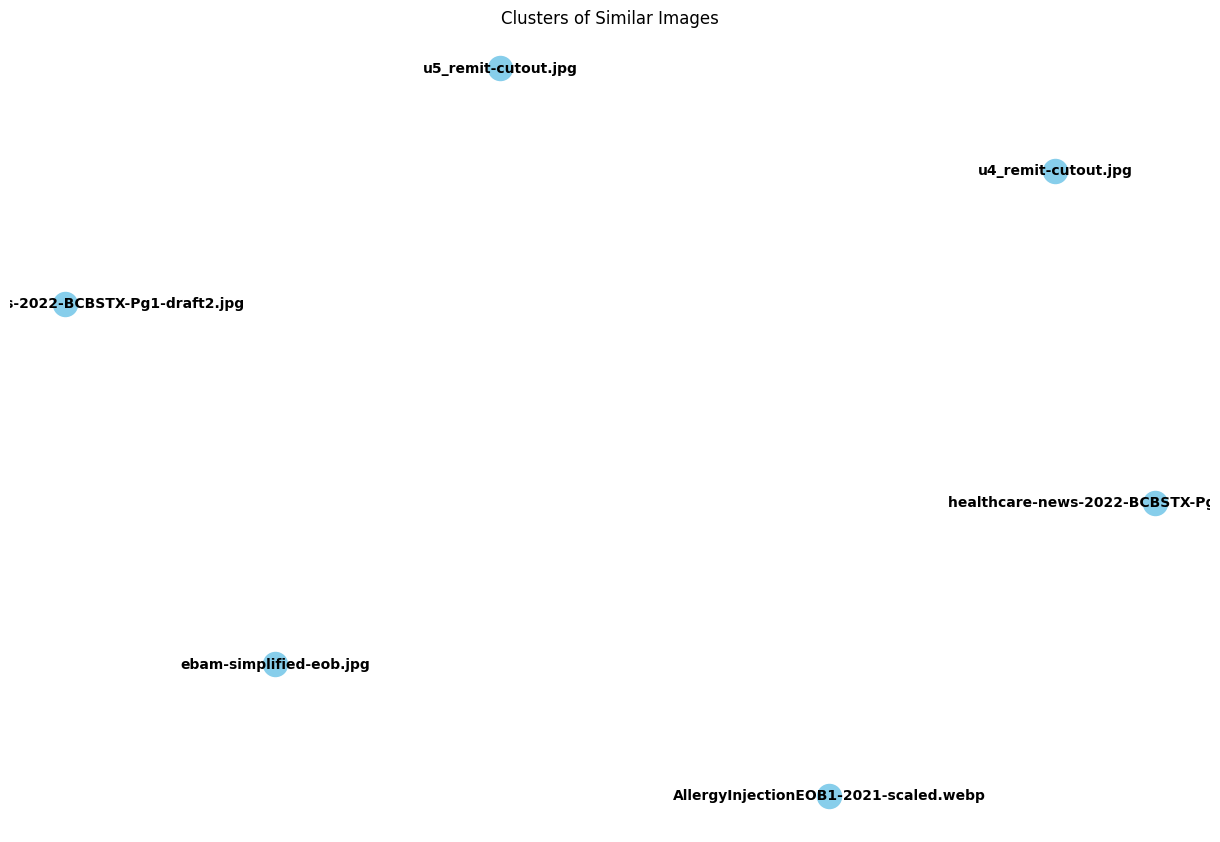

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function
def visualize_clusters_graph(image_paths, clusters):
    # Create a graph
    G = nx.Graph()

    # Add nodes for each image with their file names as labels
    for i, image_path in enumerate(image_paths):
        image_name = image_path.split('/')[-1]  # Extract file name from path
        G.add_node(i, image=image_path, label=image_name)

    # Add edges based on similarity between images
    for cluster_id, image_indices in clusters.items():
        for i in range(len(image_indices)):
            for j in range(i + 1, len(image_indices)):
                G.add_edge(image_indices[i], image_indices[j])

    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
    nx.draw(G, pos, labels={node: G.nodes[node]['label'] for node in G.nodes()}, with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_weight="bold", width=1, edge_color="gray")
    plt.title("Clusters of Similar Images")
    plt.show()

# Example usage
visualize_clusters_graph(image_paths, clusters)


In [2]:
!pip install pytesseract
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,604 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [6]:
import cv2
import pytesseract
import numpy as np
from google.colab import files
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Upload Multiple Images
def upload_images():
    print("Please upload 5-10 images:")
    uploaded_files = files.upload()
    image_paths = list(uploaded_files.keys())
    return image_paths

# Step 2: Text Detection and Bounding Boxes
def detect_text(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to preprocess the image
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform text detection using Tesseract
    custom_config = r'--oem 3 --psm 6' # OCR Engine Mode: 3 (Default, fully automatic) Page Segmentation Mode: 6 (Assume a single uniform block of text.)
    text = pytesseract.image_to_data(thresh, config=custom_config, output_type=pytesseract.Output.DICT)

    # List to store flattened bounding box coordinates
    bounding_boxes = []

    # Loop through each detected text region and flatten bounding box coordinates
    for i in range(len(text['text'])):
        x, y, w, h = text['left'][i], text['top'][i], text['width'][i], text['height'][i]
        bounding_box = [x, y, x + w, y + h]  # Store bounding box as [xmin, ymin, xmax, ymax]
        bounding_boxes.extend(bounding_box)

    return bounding_boxes

# Step 3: Comparison of Bounding Box Values
def compare_bounding_boxes(bounding_boxes1, bounding_boxes2, threshold=10):
    # Convert bounding boxes to numpy arrays
    bounding_boxes1 = np.array(bounding_boxes1)
    bounding_boxes2 = np.array(bounding_boxes2)

    # Compute Euclidean distance between the vectors
    distance = np.linalg.norm(bounding_boxes1 - bounding_boxes2)

    return distance < threshold

# Step 4: Clustering Similar Images
def cluster_images(image_paths, threshold=10):
    num_images = len(image_paths)
    similarity_matrix = np.zeros((num_images, num_images))

    # Compute similarity matrix
    for i, image_path1 in enumerate(image_paths):
        bounding_boxes1 = detect_text(image_path1)
        for j, image_path2 in enumerate(image_paths):
            bounding_boxes2 = detect_text(image_path2)
            similarity_matrix[i, j] = compare_bounding_boxes(bounding_boxes1, bounding_boxes2, threshold)

    # Create graph based on similarity matrix
    G = nx.Graph()
    for i in range(num_images):
        G.add_node(i, image=image_paths[i])
    for i in range(num_images):
        for j in range(i + 1, num_images):
            if similarity_matrix[i, j]:
                G.add_edge(i, j)

    # Perform clustering
    clusters = list(nx.connected_components(G))

    return clusters

# Step 5: Visualization
def visualize_clusters_graph(image_paths, clusters):
    G = nx.Graph()
    for i, image_path in enumerate(image_paths):
        image_name = image_path.split('/')[-1]
        G.add_node(i, image=image_path, label=image_name)

    for cluster_id, image_indices in enumerate(clusters):
        for i in range(len(image_indices)):
            for j in range(i + 1, len(image_indices)):
                G.add_edge(image_indices[i], image_indices[j])

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, labels={node: G.nodes[node]['label'] for node in G.nodes()},
            with_labels=True, node_size=300, node_color="skyblue", font_size=10, font_weight="bold", width=1,
            edge_color="gray")
    plt.title("Clusters of Similar Images")
    plt.show()

# Step 6: Main function
def main():
    # Step 1: Upload images
    image_paths = upload_images()

    # Step 4: Cluster images
    clusters = cluster_images(image_paths)

    # Step 5: Visualize clusters
    visualize_clusters_graph(image_paths, clusters)

# Run the main function
main()


Please upload 5-10 images:


Saving AllergyInjectionEOB1-2021-scaled.webp to AllergyInjectionEOB1-2021-scaled (3).webp
Saving ebam-simplified-eob.jpg to ebam-simplified-eob (3).jpg
Saving healthcare-news-2022-BCBSTX-Pg1-draft2 - Copy.jpg to healthcare-news-2022-BCBSTX-Pg1-draft2 - Copy (3).jpg
Saving healthcare-news-2022-BCBSTX-Pg1-draft2.jpg to healthcare-news-2022-BCBSTX-Pg1-draft2 (3).jpg
Saving u4_remit-cutout.jpg to u4_remit-cutout (3).jpg
Saving u5_remit-cutout.jpg to u5_remit-cutout (3).jpg


ValueError: operands could not be broadcast together with shapes (1720,) (1160,) 

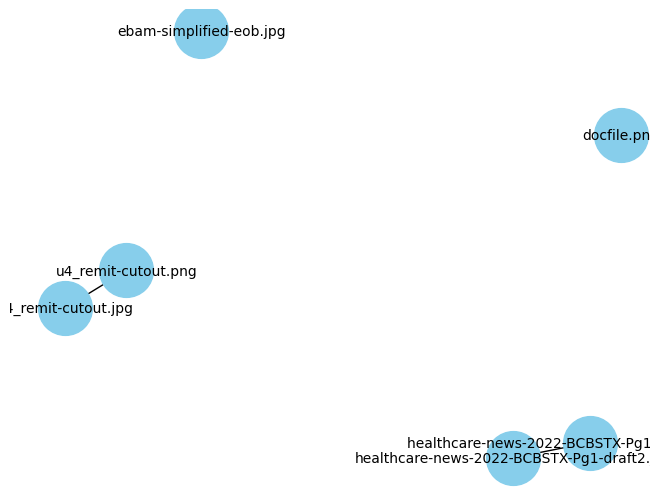

In [9]:
import cv2
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
import networkx as nx
import matplotlib.pyplot as plt

def resize_image(image, width=300, height=None):
    if height is None:
        height = width
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

def image_similarity(img1, img2):
    # Resize images to a fixed size
    img1_resized = resize_image(img1)
    img2_resized = resize_image(img2)

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

    # Compute Structural Similarity Index (SSIM) between the two images
    score, _ = ssim(gray1, gray2, full=True)
    return score

def group_similar_images(image_files, threshold=0.8):
    groups = []
    visited = set()

    for i, img_file1 in enumerate(image_files):
        if i not in visited:
            similar_group = [img_file1]
            visited.add(i)

            img1 = cv2.imread(img_file1)
            for j, img_file2 in enumerate(image_files[i+1:], start=i+1):
                if j not in visited:
                    img2 = cv2.imread(img_file2)
                    similarity = image_similarity(img1, img2)
                    if similarity >= threshold:
                        similar_group.append(img_file2)
                        visited.add(j)

            groups.append(similar_group)

    return groups

def visualize_graph(image_files, groups):
    G = nx.Graph()

    # Add all image files as nodes
    for img_file in image_files:
        node_name = os.path.basename(img_file)
        G.add_node(node_name)

    # Add edges between similar images
    for group in groups:
        if len(group) > 1:
            for i in range(len(group)):
                for j in range(i+1, len(group)):
                    node1 = os.path.basename(group[i])
                    node2 = os.path.basename(group[j])
                    G.add_edge(node1, node2)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10)
    plt.show()

if __name__ == "__main__":
    # Provide the directory containing the image files
    image_dir = "/content/images"

    # List image files
    image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

    # Group similar images
    groups = group_similar_images(image_files)

    # Visualize graph with all image nodes
    visualize_graph(image_files, groups)
